In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [131]:
df_cardio_disease = pd.read_csv("../data/cardio_train.csv", delimiter=';')

positive_cardio = df_cardio_disease['cardio'].sum()
negative_cardio = len(df_cardio_disease) - positive_cardio
all_cardio = len(df_cardio_disease)

print(f"there is", {positive_cardio}, "positive and", {negative_cardio},"negative cardio cases, total of:", {all_cardio}, "Persons tested")


there is {34979} positive and {35021} negative cardio cases, total of: {70000} Persons tested


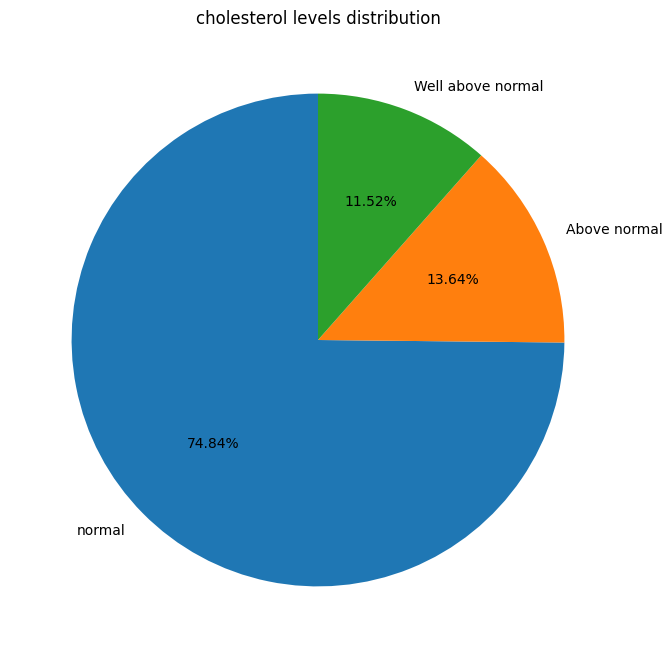

In [132]:
cholestorol_counts = df_cardio_disease['cholesterol'].value_counts()

plt.figure(figsize=(12, 8))
cholestorol_counts.plot.pie(autopct='%2.2f%%', startangle=90, labels=['normal', 'Above normal', 'Well above normal'])
plt.title('cholesterol levels distribution')
plt.ylabel('')
plt.show()

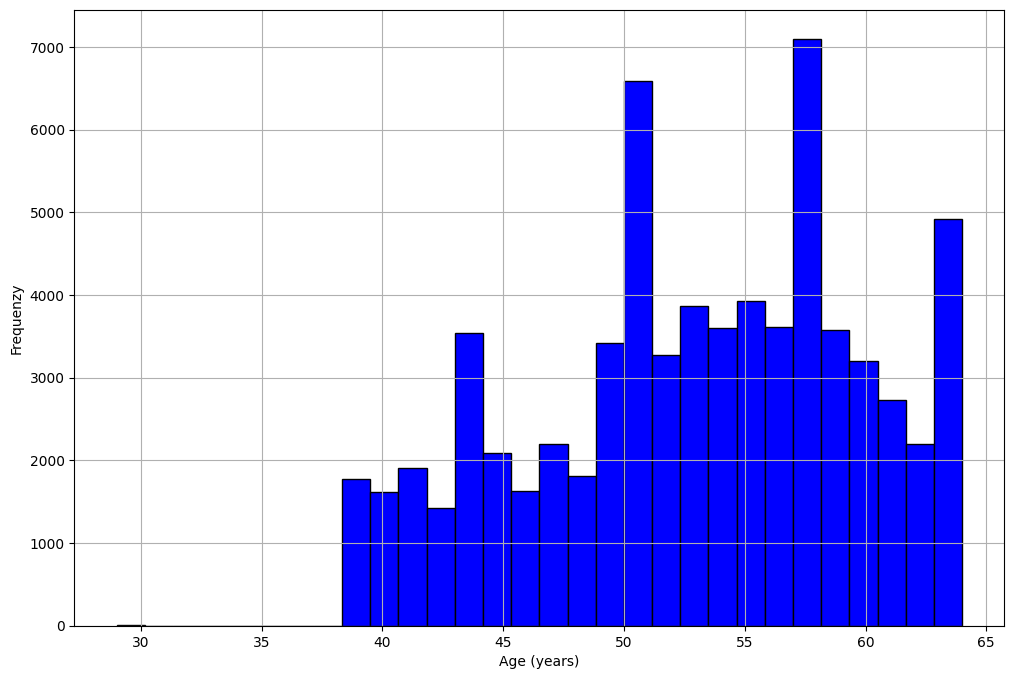

In [133]:
ages = df_cardio_disease['age'].floordiv(365)


plt.figure(figsize=(12, 8))
plt.grid(True)
plt.hist(ages, bins=30, color='blue', edgecolor='black')
plt.ylabel('Frequenzy')
plt.xlabel('Age (years)')
plt.show()

In [134]:
smoker = df_cardio_disease['smoke'].sum()
procentage_of_smokers = (smoker / len(df_cardio_disease['smoke'])) * 100

print(f"The % of smokers is", {procentage_of_smokers})

The % of smokers is {8.812857142857142}


<function matplotlib.pyplot.show(close=None, block=None)>

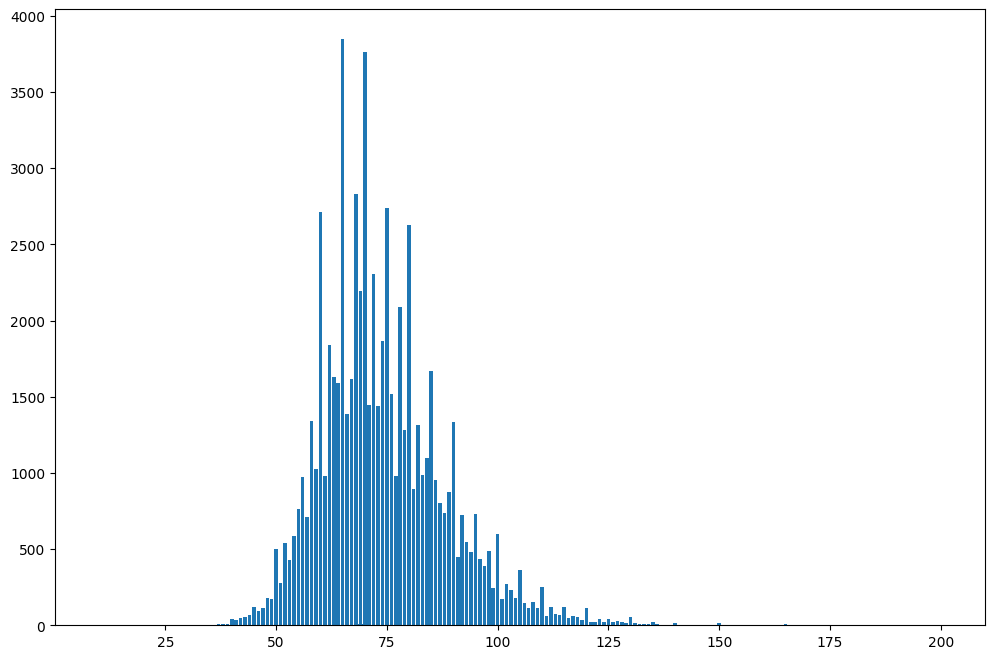

In [135]:
weight = df_cardio_disease['weight']
weight_counts = weight.value_counts()


plt.figure(figsize=(12, 8))
plt.bar(weight_counts.index, weight_counts.values)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

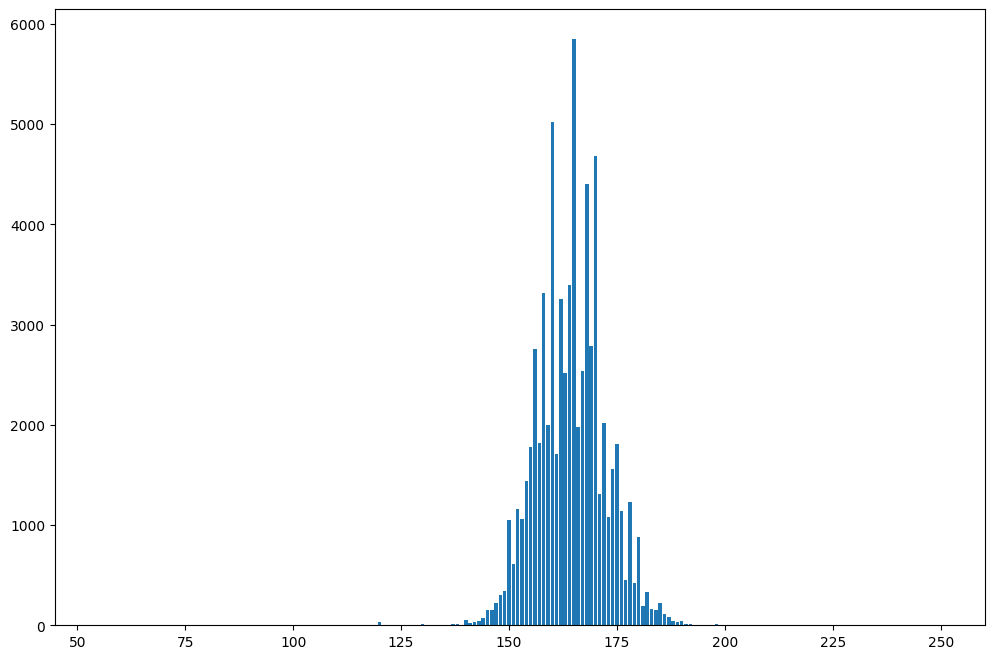

In [136]:
height = df_cardio_disease['height']
valune_count_height = height.value_counts()

plt.figure(figsize=(12, 8))
plt.bar(valune_count_height.index, valune_count_height.values)
plt.show

In [137]:
women = ((df_cardio_disease["gender"] == 1) & (df_cardio_disease['cardio'])).sum()
men = ((df_cardio_disease["gender"] == 2) & (df_cardio_disease['cardio'])).sum()

print(f"There is", {women}, "women and", {men}, "men with cardiovascular disease")

There is {22616} women and {12363} men with cardiovascular disease


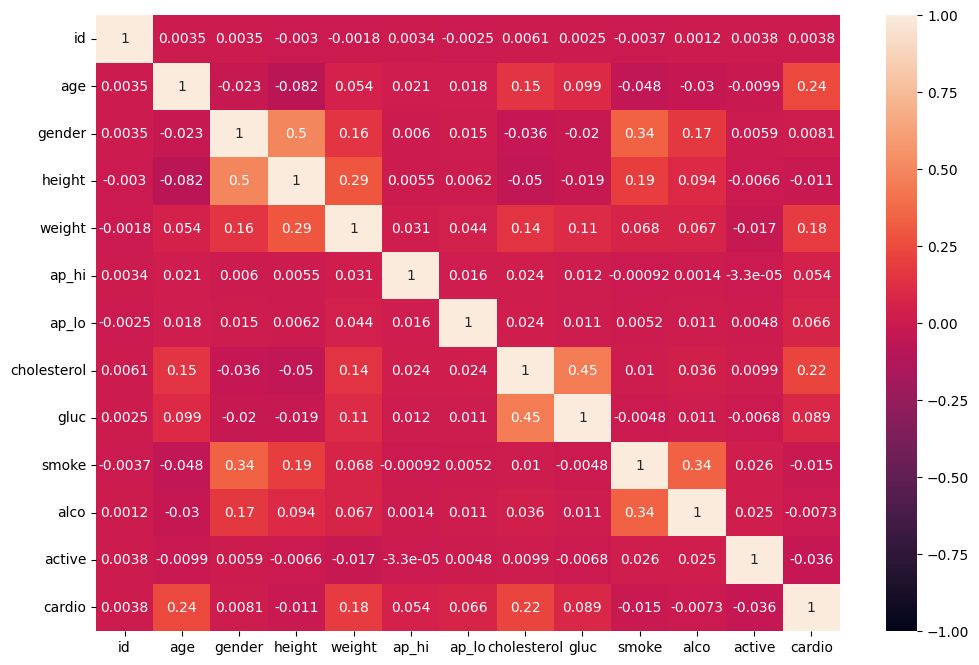

In [138]:
corr_cardio_disease = df_cardio_disease.corr()

plt.figure(figsize=(12,8))
heatmap = sns.heatmap(data=corr_cardio_disease, vmax=1, vmin=-1, annot=True)

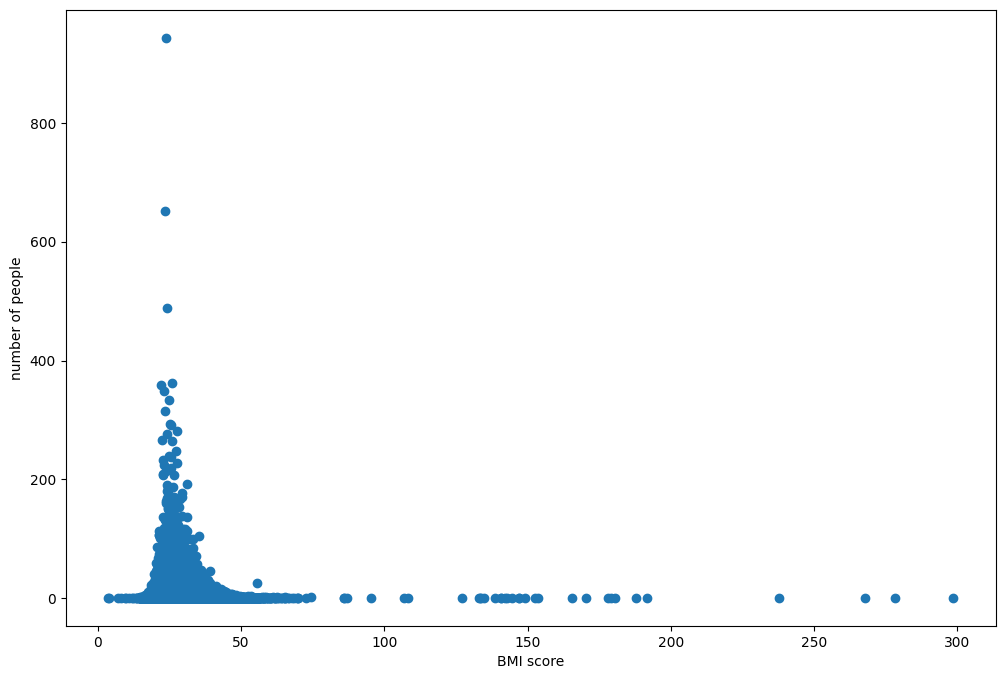

In [139]:
height_in_m = df_cardio_disease["height"] / 100

BMI = df_cardio_disease['weight'] / (height_in_m**2)

BMI_data = BMI.value_counts()

plt.figure(figsize=(12,8))
plt.scatter(BMI_data.index, BMI_data.values)
plt.xlabel("BMI score")
plt.ylabel("number of people")
plt.show()

In [140]:

df_cardio_disease["BMI"] = BMI

BMI_df = df_cardio_disease[df_cardio_disease['BMI'] <= 75]

In [141]:
BMI_df.describe()
BMI_df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,1.000000,0.003486,0.003526,-0.003854,-0.001253,0.003380,-0.002540,0.006119,0.002468,-0.003652,0.001182,0.003885,0.003857,0.000728
age,0.003486,1.000000,-0.022780,-0.084536,0.054050,0.020778,0.017634,0.154456,0.098820,-0.047540,-0.029634,-0.010017,0.238183,0.100356
gender,0.003526,-0.022780,1.000000,0.512603,0.156362,0.006011,0.015263,-0.035826,-0.020461,0.338177,0.170998,0.005854,0.008223,-0.109664
height,-0.003854,-0.084536,0.512603,1.000000,0.305548,0.005498,0.005881,-0.052815,-0.020416,0.193238,0.097032,-0.008255,-0.011702,-0.217560
weight,-0.001253,0.054050,0.156362,0.305548,1.000000,0.030646,0.043847,0.141963,0.106996,0.067642,0.067183,-0.017027,0.181719,0.855916
ap_hi,0.003380,0.020778,0.006011,0.005498,0.030646,1.000000,0.016082,0.023757,0.011829,-0.000924,0.001395,-0.000056,0.054475,0.028644
ap_lo,-0.002540,0.017634,0.015263,0.005881,0.043847,0.016082,1.000000,0.024009,0.010795,0.005184,0.010593,0.004768,0.065718,0.041556
cholesterol,0.006119,0.154456,-0.035826,-0.052815,0.141963,0.023757,0.024009,1.000000,0.451577,0.010414,0.035825,0.009924,0.221151,0.170253
gluc,0.002468,0.098820,-0.020461,-0.020416,0.106996,0.011829,0.010795,0.451577,1.000000,-0.004733,0.011274,-0.006860,0.089258,0.118468
smoke,-0.003652,-0.047540,0.338177,0.193238,0.067642,-0.000924,0.005184,0.010414,-0.004733,1.000000,0.340083,0.025759,-0.015548,-0.032796


In [142]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cardio = BMI_df
cardio['gender'] = le.fit_transform(cardio["gender"])


C:\Users\Kevin\AppData\Local\Temp\ipykernel_3144\99864212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio['gender'] = le.fit_transform(cardio["gender"])


In [143]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()

one_hot_chol = ohe.fit_transform(cardio['cholesterol'].values.reshape(len(cardio['cholesterol']), 1)).toarray()
one_hot_chol = one_hot_chol[:, 1:].astype(int)

df_one_hot_chol = pd.DataFrame(one_hot_chol, columns=['above normal chol', 'well above normal chol'])

df_one_hot_chol.head()

,above normal chol,well above normal chol
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0


In [144]:
one_hot_gluc = ohe.fit_transform(cardio['gluc'].values.reshape(len(cardio['gluc']), 1)).toarray()
one_hot_gluc = one_hot_gluc[:, 1:].astype(int)

df_one_hot_gluc = pd.DataFrame(one_hot_gluc, columns=['above normal gluc', 'well above normal gluc'])

df_one_hot_gluc.head()
cardio['age'] = cardio['age'].floordiv(365)
cardio.drop(['weight', 'height', 'id'], axis=1, inplace=True)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_3144\3501606800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio['age'] = cardio['age'].floordiv(365)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_3144\3501606800.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio.drop(['weight', 'height', 'id'], axis=1, inplace=True)


In [145]:
cardio.reset_index(inplace=True)
cardio.drop(['index'], axis=1, inplace=True)
cardio.head()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_3144\3533762591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio.drop(['index'], axis=1, inplace=True)


,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,1,110,80,1,1,0,0,1,0,21.967120
1,55,0,140,90,3,1,0,0,1,1,34.927679
2,51,0,130,70,3,1,0,0,0,1,23.507805
3,48,1,150,100,1,1,0,0,1,1,28.710479
4,47,0,100,60,1,1,0,0,0,0,23.011177


In [146]:
df = pd.concat([cardio.iloc[:, :10], df_one_hot_chol, df_one_hot_gluc], axis=1)
df.drop(['cholesterol', 'gluc'], axis=1, inplace=True)
df.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,above normal chol,well above normal chol,above normal gluc,well above normal gluc
0,50,1,110,80,0,0,1,0,0,0,0,0
1,55,0,140,90,0,0,1,1,0,1,0,0
2,51,0,130,70,0,0,0,1,0,1,0,0
3,48,1,150,100,0,0,1,1,0,0,0,0
4,47,0,100,60,0,0,0,0,0,0,0,0


In [147]:
X = cardio.drop('cardio', axis=1)
y = cardio['cardio']

sc = StandardScaler()
X = sc.fit_transform(X)

<Axes: >

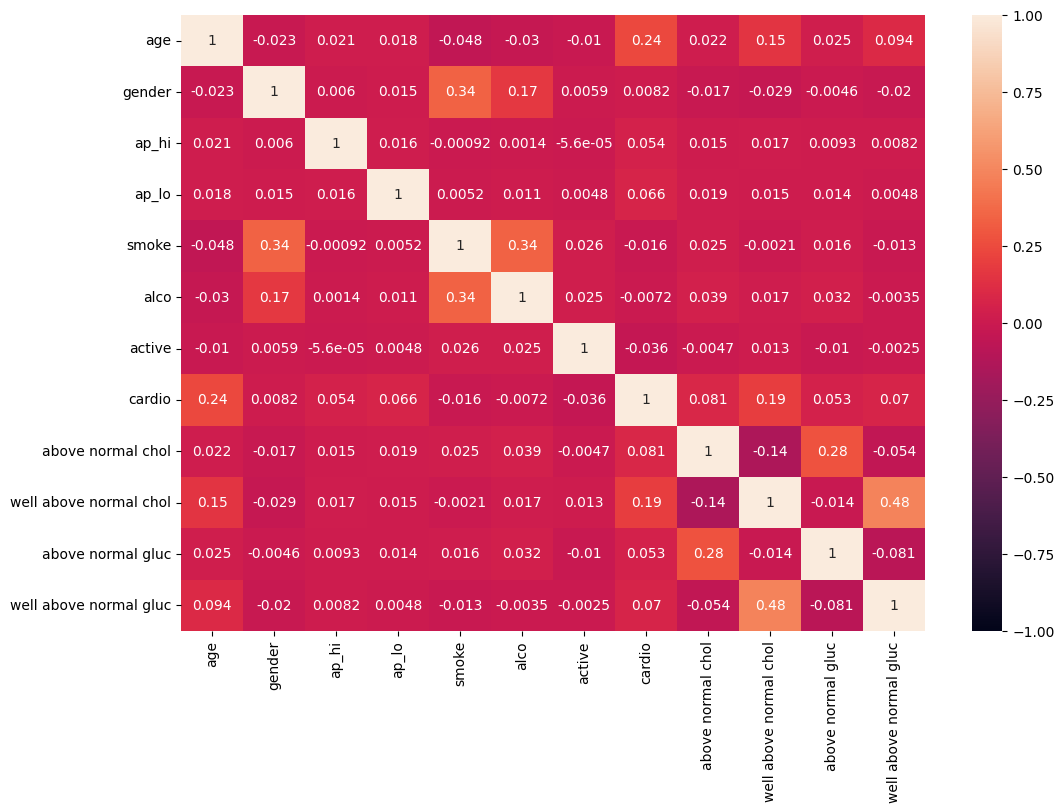

In [148]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [150]:
model1=KNeighborsClassifier(n_neighbors=50)
model2=LogisticRegression()
model3=SVC(kernel="rbf",C=1)
model4=RandomForestClassifier(n_estimators=500)

T1=("knn",model1)
T2=("lgr",model2)
T3=("svm",model3)
T4=("rf",model4)

In [151]:
model0=LogisticRegression()
model0.fit(x_train,y_train)
y_pred=model0.predict(x_test)
accuracy_score(y_test,y_pred)

0.9998570816064027

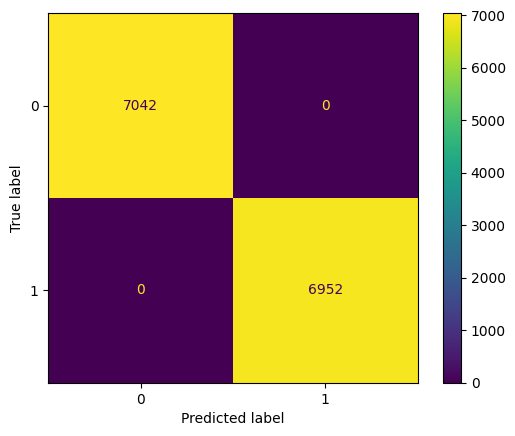

In [152]:
model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
ConfusionMatrixDisplay(cm).plot()

In [153]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7042
           1       1.00      1.00      1.00      6952

    accuracy                           1.00     13994
   macro avg       1.00      1.00      1.00     13994
weighted avg       1.00      1.00      1.00     13994



In [154]:
# bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
# labels= ['Underweight', 'Normal Range', 'Over-Weight', 'obese(class I)', 'Obese(class II)', 'Obese(Class III)']


# BMI_df['BMI_category'] = pd.cut(BMI_df['BMI'], bins=bins, labels=labels, right=False)
# BMI_df['age'] = BMI_df['age'].floordiv(365)

# BMI_df

In [155]:
# def categorize_blood_pressure(systolic, diastolic):
#     bp_categories = {
#         'Normal Range': {'systolic': (90, 130), 'diastolic': (60, 80)},
#         'At Risk Range': {'systolic': (121, 139), 'diastolic': (81, 89)},
#         'High Blood Pressure': {'systolic': (130, 180), 'diastolic': (90, 120)},
#         'Hypertensive Crisis': {'systolic': (180, 220), 'diastolic': (120, 140)}
#     }

#     for category, criteria in bp_categories.items():
#         if criteria['systolic'][0] <= systolic <= criteria['systolic'][1] and criteria['diastolic'][0] <= diastolic <= criteria['diastolic'][1]:
#             return category

#     return "Unreasonable Blood Pressure"

# example_systolic = 130
# example_diastolic = 70
# bp_category = categorize_blood_pressure(example_systolic, example_diastolic)
# bp_category

In [156]:
# BMI_df['bp_category'] = BMI_df.apply(
#     lambda row: categorize_blood_pressure(row['ap_hi'], row['ap_lo']), axis=1)

# # Display the first few rows of the updated dataframe to see the new categorical feature
# BMI_df.head(20)

In [157]:
# df_encoded = pd.get_dummies(BMI_df, columns=['bp_category', 'BMI_category'])

# corr_df = df_encoded.corr()

# plt.figure(figsize=(18,12))
# heatmap = sns.heatmap(data=corr_df, vmax=1, vmin=-1, annot=True)




In [158]:
# # Create a copy of the dataframe
# df_categorical = BMI_df.copy()

# df_categorical.drop(['ap_hi', 'ap_lo', 'BMI'], axis=1, inplace=True)

# # Perform one-hot encoding
# df_categorical = pd.get_dummies(df_categorical, columns=['BMI_category', 'bp_category', 'gender'])

# df_categorical.head()


In [159]:
# df2_categorical = BMI_df.copy()

# df2_categorical = pd.get_dummies(df2_categorical, columns=['gender'])
# df2_categorical.drop(['BMI_category', 'bp_category',], axis=1, inplace=True)

# df2_categorical.head(10)


In [160]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler	
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np

# X = df2_categorical.drop('cardio', axis=1)
# y = df2_categorical['cardio']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# scaler = StandardScaler()

# Log_pipe = Pipeline([("scaler", scaler), ("logistic_regression", LogisticRegression(max_iter=1000, penalty="elasticnet", solver="saga"))])
# knn_pipe = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

# param_grid_knn = {"knn__n_neighbors": range(1, 50)}

# l1_ratio = np.linspace(0, 1, 10)
# param_grid_log_reg = {"logistic_regression__l1_ratio": [0.1, 0.5, 0.9]}

# classifer_KNN = GridSearchCV(knn_pipe, param_grid_knn, cv=5, scoring="accuracy")

# classifer_log_reg = GridSearchCV(Log_pipe, param_grid_log_reg, cv=5, scoring="accuracy")

# classifer_KNN.fit(X_train, y_train)
# classifer_log_reg.fit(X_train, y_train)



In [161]:
# svm_pipe = Pipeline([("scaler", scaler), ("svm", SVC())])
# param_svc = {"svm__C": [0.1, 1], "svm__gamma": [0.1, 0.01], "svm__kernel": ["rbf"]}
# classifier_svm = GridSearchCV(svm_pipe, param_svc, cv=5, scoring="accuracy")
# classifier_svm.fit(X_train, y_train)

In [162]:
# y_pred = classifer_log_reg.predict(X_test)
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)
# ConfusionMatrixDisplay(cm).plot()

In [163]:
# y_pred = classifer_KNN.predict(X_test)
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)
# ConfusionMatrixDisplay(cm).plot()   

In [164]:
# y_pred = classifier_svm.predict(X_test)
# print(classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)
# ConfusionMatrixDisplay(cm).plot()